Content
Input variables:
* 1 - Item_Identifier
* 2 - Item_Weight
* 3 - Item_Fat_Content
* 4 - Item_Visibility
* 5 - Item_Type
* 6 - Item_MRP
* 7 - Outlet_Identifier
* 8 - Outlet_Establishment_Year
* 9 - Outlet_Size
* 10 - Outlet_Location_Type
* 11 - Outlet_Type
* 12 - Item_Outlet_Sales

In [423]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
3
from sklearn import metrics

Data Collection and Analysis

In [425]:
# loading the dataset
path = "/content/drive/MyDrive/dataset/bigmart.csv"
big_mart_data = pd.read_csv(path)

In [426]:
# first five rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [427]:
# number of data points and number of features
big_mart_data.shape

(8523, 12)

In [428]:
# getting some informations about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size             
*   Outlet_Location_Type       
*   Outlet_Type



In [429]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Replacing the missing values in "Item_Weight" with meam

In [430]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [431]:
# filling the missing values in "Item_Weight" column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace = True)

In [432]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing the missing values in "Outlet_Size" with mode

In [433]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [434]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [435]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [436]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [437]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [438]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [439]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [440]:
# statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [441]:
sns.set()

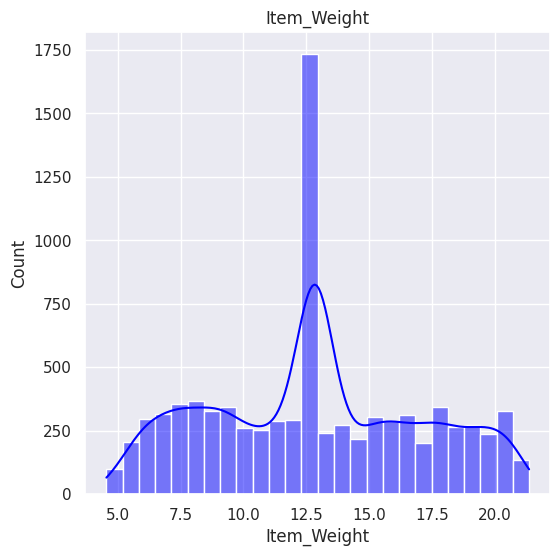

In [442]:
# Item_Weight distribution
plt.figure(figsize = (6, 6))
sns.histplot(big_mart_data['Item_Weight'], kde = True, color = 'blue')
plt.title('Item_Weight')
plt.show()


Item_Weight Distribution

The histogram displays the distribution of 'Item_Weight' in the Big Mart dataset, using bars to represent different weight ranges. The bar heights indicate the frequency of items within each range. A Kernel Density Estimate (KDE) curve overlays the histogram, offering a smoothed probability density function. It shows that average value 12.5 has highest frequency. This visualization is valuable for exploring the distribution patterns of item weights, aiding in identifying trends or outliers in the Big Mart dataset.

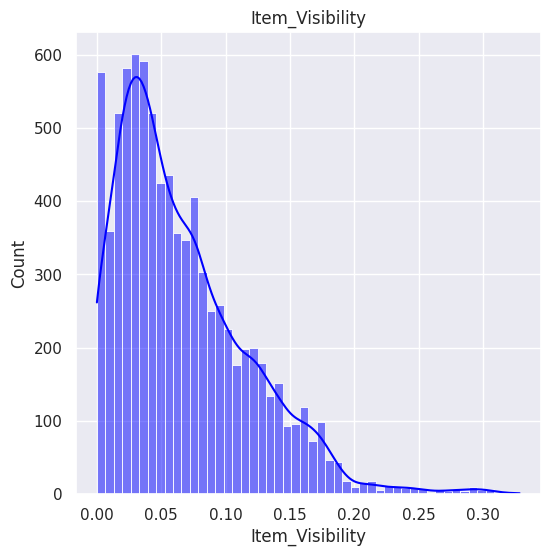

In [443]:
# Item_Visibility distribution
plt.figure(figsize = (6, 6))
sns.histplot(big_mart_data['Item_Visibility'], kde = True, color = 'blue')
plt.title('Item_Visibility')
plt.show()

Item_Visibility Distribution

The histogram displays the distribution of 'Item_Visibility' in the Big Mart dataset. The histogram is complemented by a Kernel Density Estimate (KDE) curve for a smoothed representation of the distribution. Interpreting the histogram, as the frequency of data is observed to be highest on the left side, it indicates a left-skewed distribution. In the left-skewed distribution, the majority of data points are concentrated on the right side, while the tail of the distribution extends to the left.

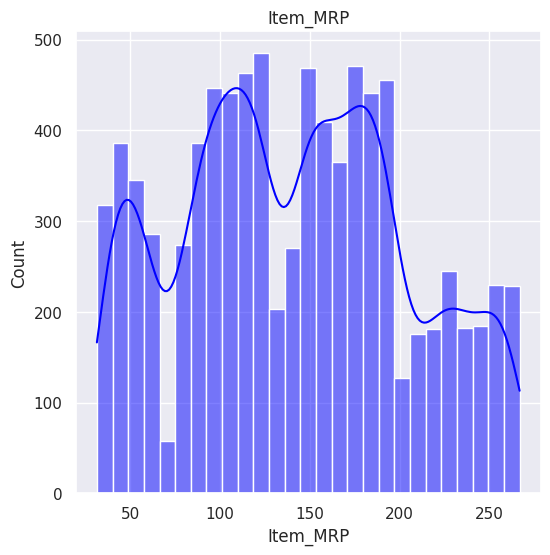

In [444]:
# Item_MRP distribution
plt.figure(figsize = (6, 6))
sns.histplot(big_mart_data['Item_MRP'], kde = True, color = 'blue')
plt.title('Item_MRP')
plt.show()

Item_MRP distribution

The histogram to displays the distribution of 'Item_MRP' (Maximum Retail Price) in the Big Mart dataset. The data distribution is quite irregular as seen on the graph above. This visualization provides valuable insights into the distribution patterns of maximum retail prices for items in the Big Mart dataset. By examining the histogram and KDE curve, one can gain an understanding of the concentration and variability of MRP values, aiding in exploratory data analysis and the identification of potential trends within the dataset.

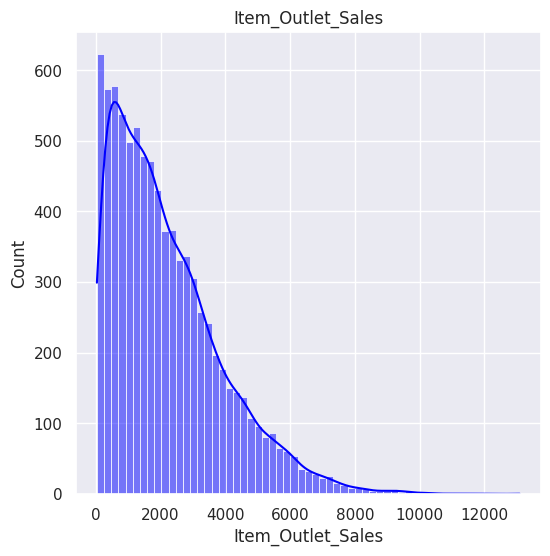

In [445]:
# Item_Outlet_Sales distribution
plt.figure(figsize = (6, 6))
sns.histplot(big_mart_data['Item_Outlet_Sales'], kde = True, color = 'blue')
plt.title('Item_Outlet_Sales')
plt.show()

Item_Outlet Distribution

The histogram displays the distribution of 'Item_MRP' in the Big Mart dataset. The histogram is complemented by a Kernel Density Estimate (KDE) curve for a smoothed representation of the distribution. Interpreting the histogram, as the frequency of data is observed to be highest on the left side, it indicates a left-skewed distribution. In the left-skewed distribution, the majority of data points are concentrated on the right side, while the tail of the distribution extends to the left.

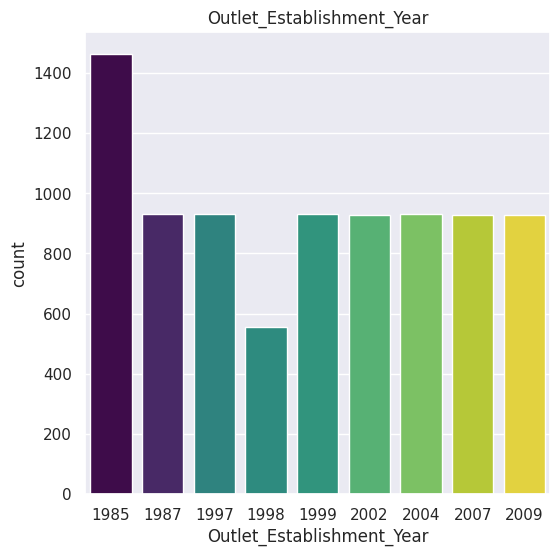

In [446]:
# Outlet_Establishment_Year	column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', hue = 'Outlet_Establishment_Year', data = big_mart_data, palette='viridis', legend = False)
plt.title('Outlet_Establishment_Year')
plt.show()

Outlet_Establishment_Year Distribution

The plot illustrates the distribution of establishment years for the outlets in the Big Mart dataset. Almost all the years frequency is the same with 1998 being the lowest occuring value and 1985 being highest repeated value. This graphical representation provides insights into the temporal distribution of outlet establishments, aiding in understanding the dataset's temporal characteristics.

Categorical Features

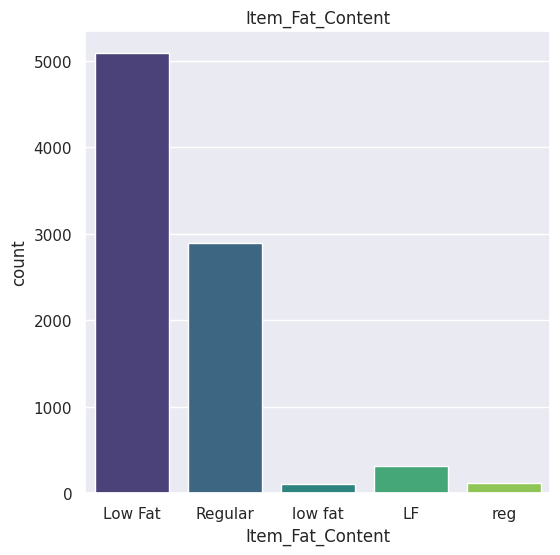

In [447]:
# Item_Fat_Content column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content', hue = 'Item_Fat_Content', data = big_mart_data, palette='viridis', legend = False)
plt.title('Item_Fat_Content')
plt.show()

Item_Fat_Content Distribution

The count plot displays the distribution of 'Item_Fat_Content' in the Big Mart dataset. There seems to be some error as there are 3 separate values of 'low fat' and 2 for 'regular'. This visualization offers quick insights into the prevalence of various fat content types among items, simplifying the understanding of product composition in the dataset. The absence of a legend streamlines interpretation, as colors directly correspond to fat content categories.

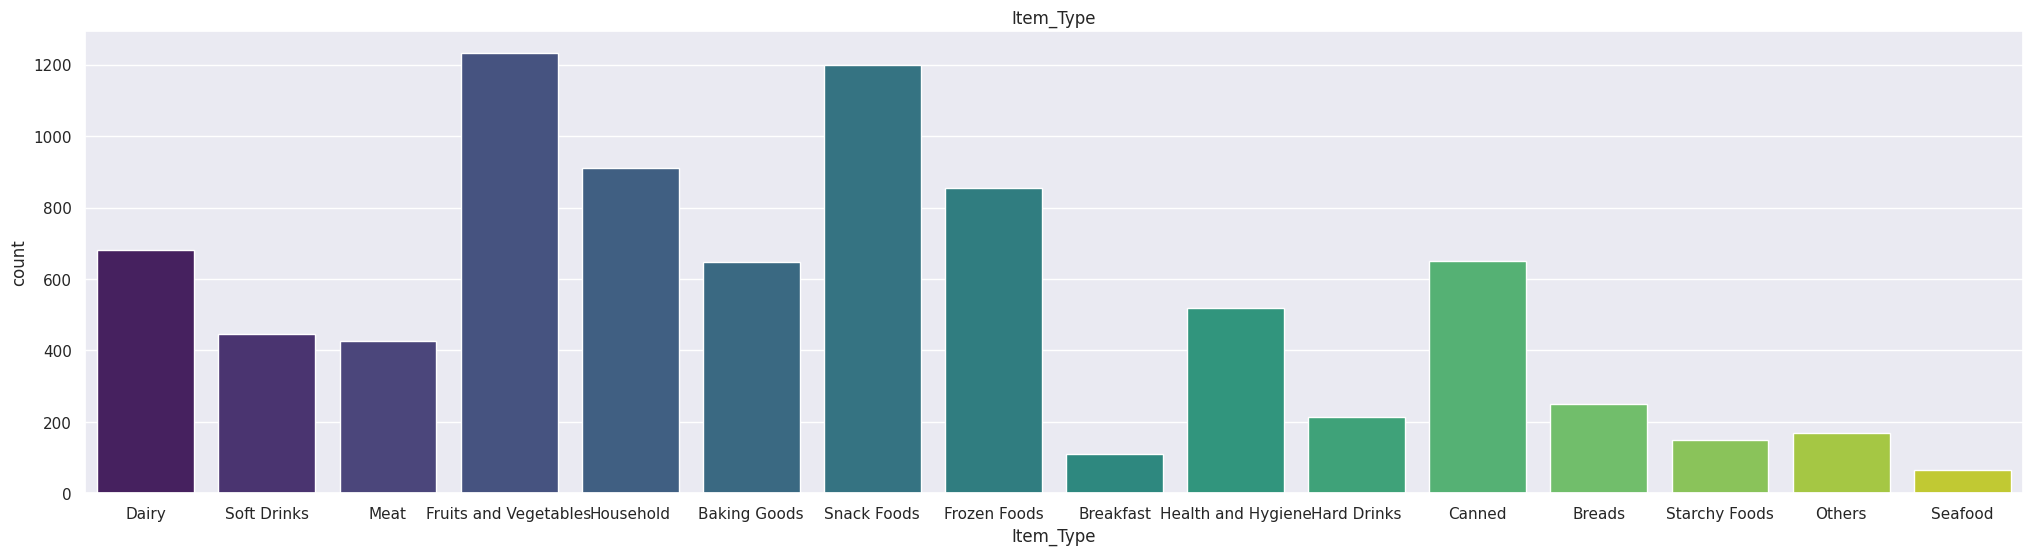

In [448]:
# Item_Type	column
plt.figure(figsize = (25,6))
sns.countplot(x = 'Item_Type', hue = 'Item_Type', data = big_mart_data, palette='viridis', legend = False)
plt.title('Item_Type')
plt.show()

Item_Type Distribution

The count plot for the 'Item_Type' column in the Big Mart dataset utilizes a sizable plot of 25x6 inches. Each bar represents the frequency of different item types. This visualization provides a quick overview of the distribution and abundance of various product types in the dataset.

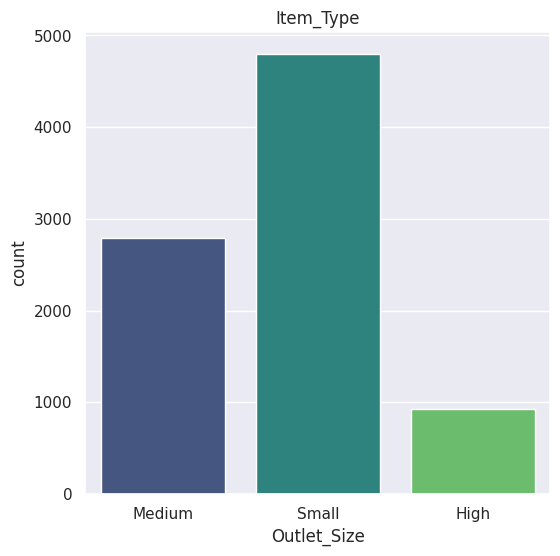

In [449]:
# Outlet_Size	column
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Size', hue = 'Outlet_Size', data = big_mart_data, palette='viridis', legend = False)
plt.title('Item_Type')
plt.show()

Item_Type Distribution

The count plot displays the distribution for the 'Outlet_Size' column in the Big Mart dataset. In the graph, there are 3 values with highest frequency value being 'Small' and lowest frequency value 'High'. Each bar represents the frequency of different outlet sizes. This visualization offers a quick overview of outlet size distribution, aiding in understanding the dataset's retail outlet dimensions.

Data Pre-Processing

In [450]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [451]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [452]:
big_mart_data.replace({'Item_Fat_Content': {'low fat' : 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace = True)

In [453]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [454]:
encoder = LabelEncoder()

In [455]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [456]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [457]:
X = big_mart_data.drop(columns = 'Item_Outlet_Sales', axis = 1)
Y = big_mart_data['Item_Outlet_Sales']

In [458]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [459]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into Training data and Testing data

In [460]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [461]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

XGBoost Regressor model

In [462]:
regressor = XGBRegressor()

In [463]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [464]:
# prediction on training data
xgbtrain_data_prediction = regressor.predict(X_train)

In [465]:
# R squared Value
r2_train = metrics.r2_score(Y_train, xgbtrain_data_prediction)

In [466]:
print('R Squared value for XGBoost for XGBoost (Train):  ', r2_train)

R Squared value for XGBoost for XGBoost (Train):   0.8762174618111388


In [467]:
# prediction on test data
xgbtest_data_prediction = regressor.predict(X_test)

In [468]:
# R squared Value
r2_test = metrics.r2_score(Y_test, xgbtest_data_prediction)

In [469]:
print('R Squared Value for XGBoost (Test): ', r2_test)

R Squared Value for XGBoost (Test):  0.5017253991620692


Linear Regression model

In [470]:
linear_model = LinearRegression()

In [471]:
linear_model.fit(X_train, Y_train)

LinearRegression()

Evaluation

In [472]:
# prediction on training data
linear_train_predictions = linear_model.predict(X_train)

In [473]:
# R squared Value
r2_train_linear = r2_score(Y_train, linear_train_predictions)

In [474]:
print('R Squared value for Linear Regression (Training): ', r2_train_linear)

R Squared value for Linear Regression (Training):  0.5071929167339231


In [475]:
# predictions on the test data
linear_test_predictions = linear_model.predict(X_test)

In [476]:
# R squared Value
r2_test_linear = r2_score(Y_test, linear_test_predictions)

In [477]:
print('R Squared value for Linear Regression (Test): ', r2_test_linear)

R Squared value for Linear Regression (Test):  0.48912987193626367


Hyper-parameter Optimization with GridSearchCV

In [478]:
# as random RGBoost Regression model performed the best, I choose it as my final model

# define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# initialize GridSearchCV
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 5, scoring = 'r2', n_jobs = -1)

# fit the model to the data
grid_search.fit(X_train, Y_train)

# get the best parameters and best model
best_params = grid_search.best_params_

# display the results
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


Hyperparameter Optimization

The above process is hyperparameter tuning for a Random Forest Classifier using GridSearchCV. This technique helps identify the optimal set of hyperparameters for the model, enhancing its performance. The defined hyperparameters and their possible values include the number of trees in the forest (n_estimators), the maximum depth of each tree (max_depth), the minimum number of samples required to split an internal node (min_samples_split), and the minimum number of samples required to be at a leaf node (min_samples_leaf).

Avoiding Overfitting or Underfitting: Hyperparameter optimization helps find the right balance between overfitting and underfitting. Overfitting occurs when a model learns the training data too well but fails to generalize to new data, while underfitting occurs when a model is too simple and doesn't capture the underlying patterns in the data.

Cross-Validation

In [479]:
# create the XGBoost Regressor model with the best hyperparameters
best_xgb_reg = XGBRegressor(**best_params)

# perform cross-validation
cross_val_scores = cross_val_score(best_xgb_reg, X, Y, cv = 5, scoring = 'r2')

# display the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.60512535 0.58791592 0.57295753 0.60454394 0.60588712]


Feature Selection

In [480]:
# fit the xgboost model on the entire dataset
best_xgb_reg.fit(X_train, Y_train)

# get feature importances
feature_importances = best_xgb_reg.feature_importances_

# create a dataframe with feature names and their importance score
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# sort features by importance in descending order
sorted_features = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# display the sorted feature importances
print("Feature Importances: ")
print(sorted_features)

N = 4   # adjust the value of number of features to select
top_n_features = sorted_features.head(N)['Feature'].tolist()
print("Top", N, "Features:", top_n_features)

Feature Importances: 
                      Feature  Importance
10                Outlet_Type    0.415178
5                    Item_MRP    0.232025
7   Outlet_Establishment_Year    0.172084
6           Outlet_Identifier    0.050259
9        Outlet_Location_Type    0.033554
8                 Outlet_Size    0.030025
3             Item_Visibility    0.014976
4                   Item_Type    0.014849
0             Item_Identifier    0.013827
2            Item_Fat_Content    0.012704
1                 Item_Weight    0.010522
Top 4 Features: ['Outlet_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Identifier']


Feature Selection

The feature importance analysis begins by extracting importance scores from the best Random Forest model, obtained through hyperparameter tuning. These scores, reflecting the contribution of each feature to the model's predictions, are organized into a DataFrame pairing feature names with their respective importance values. This DataFrame is then sorted in descending order, creating a clear hierarchy of feature importance. The resulting list is displayed, offering insights into which features wield the most influence in the model. Additionally, the code identifies and prints the top five features, providing a succinct summary of the key factors influencing the model's decision-making.

Building the Final model

In [481]:
# extract the top features from the training and test sets
X_train_final = X_train[top_n_features]
X_test_final = X_test[top_n_features]

# rebuild the final Random Forest model with best hyperparameters
final_xgb_model = XGBRegressor(**best_params)
final_xgb_model.fit(X_train_final, Y_train)

# make predictions on the final training set
final_train_predictions = final_xgb_model.predict(X_train_final)

# evaluate the final model using R squared on the training set
r2_train_final = r2_score(Y_train, final_train_predictions)
print("Final Model R Squared Value on Training set: ", r2_train_final)

# make predictions on the final test set
final_test_predictions = final_xgb_model.predict(X_test_final)

# evaluate the final model using R squared on the test set
r2_test_final = r2_score(Y_test, final_test_predictions)
print("Final Model R Squared Value on Test Set: ", r2_test_final)

Final Model R Squared Value on Training set:  0.6217914054303525
Final Model R Squared Value on Test Set:  0.5859525353665874


Testing the final model to predict sales

Model without Hyperparameter Tuning and Feature Selection

In [482]:
# Assuming new_data is a dictionary with keys corresponding to feature names
new_data = {
    'Item_Identifier': 156,
    'Item_Weight': 9.30,
    'Item_Fat_Content': 0,
    'Item_Visibility': 0.016047,
    'Item_Type': 4,
    'Item_MRP': 249.8092,
    'Outlet_Identifier': 9,
    'Outlet_Establishment_Year': 1999,
    'Outlet_Size': 1,
    'Outlet_Location_Type': 0,
    'Outlet_Type': 1
}
# Extract values from the dictionary and convert to a list
individual_data = list(new_data.values())

# Reshape the data for prediction (assuming individual_data is a single data point)
individual_data_reshaped = np.array(individual_data).reshape(1, -1)

# Make the sales prediction
sales_prediction = regressor.predict(individual_data_reshaped)

print("Sales Prediction:", sales_prediction)

Sales Prediction: [4280.985]


Final Model after Hyperparameter Tuning and Feature Selection

In [483]:
# Assuming new_data is a dictionary with keys corresponding to feature names
individual_data = {
    'Outlet_Type': 1,
    'Item_MRP': 249.8092,
    'Outlet_Establishment_Year': 1999,
    'Outlet_Identifier': 9
}

# Extract values from the dictionary and convert to a list
individual_data = list(individual_data.values())

# Reshape the data for prediction (assuming individual_data is a single data point)
individual_data_reshaped = np.array(individual_data).reshape(1, -1)

# ensure that the reshaped data has the correct number of features
assert individual_data_reshaped.shape[1] == len(top_n_features), "Number of features does not match"

# Make the sales prediction
final_sales_prediction = final_xgb_model.predict(individual_data_reshaped)

print("Sales Prediction:", final_sales_prediction)


Sales Prediction: [4062.336]


For 2nd Model: Linear Regression

Hyperparameter Optimization

In [484]:
# define hyperparameters and their possible values
param_grid_linear = {
    'fit_intercept': [True, False],  # Whether to calculate the intercept for this model
    'copy_X': [True, False],           # Whether to copy X before fitting
    'positive': [True, False],          # When set to True, forces the coefficients to be positive
    'n_jobs': [1, -1]                   # Number of jobs to use for computation
}

# initialize GridSearchCV with Random Forest model and parameter grid
grid_search_linear = GridSearchCV(linear_model, param_grid_linear, cv = 5, scoring = 'r2', n_jobs = -1)

# fit the grid search to the data
grid_search_linear.fit(X_train, Y_train)

# print the best hyperparameters
best_params_linear = grid_search_linear.best_params_
print("Best Hyperparameters for Linear Regression:", best_params_linear)

# get the best model from grid search
best_linear_model = grid_search_linear.best_estimator_

Best Hyperparameters for Linear Regression: {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}


Feature Selection

In [485]:
# Get coefficients from the linear model
coefficients_linear = best_linear_model.coef_

# Create a dataframe with feature names and their coefficients
coefficients_df_linear = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients_linear})

# Sort features by coefficient magnitude in descending order
sorted_features_linear = coefficients_df_linear.reindex(coefficients_df_linear['Coefficient'].abs().sort_values(ascending=False).index)

# Display the sorted feature coefficients
print("Feature Coefficients:")
print(sorted_features_linear)

N = 7
# Select the top N features based on coefficient magnitude
top_n_features_linear = sorted_features_linear.head(N)['Feature'].tolist()
print("Top", N, "Features:", top_n_features_linear)


Feature Coefficients:
                      Feature  Coefficient
3             Item_Visibility -1530.960522
10                Outlet_Type   830.065922
8                 Outlet_Size  -108.997323
9        Outlet_Location_Type  -105.344716
6           Outlet_Identifier    53.413834
2            Item_Fat_Content    34.296842
5                    Item_MRP    15.602365
1                 Item_Weight    -3.726039
7   Outlet_Establishment_Year    -0.429582
4                   Item_Type     0.351118
0             Item_Identifier    -0.011296
Top 7 Features: ['Item_Visibility', 'Outlet_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Identifier', 'Item_Fat_Content', 'Item_MRP']


Rebuilding the Final Model

In [486]:
# extract the top features from the training and test sets
X_train_final_linear = X_train[top_n_features_linear]
X_test_final_linear = X_test[top_n_features_linear]

# rebuild the final Random Forest model with best hyperparameters
final_linear_model = LinearRegression(**best_params_linear)
final_linear_model.fit(X_train_final_linear, Y_train)

# make predictions on the final training set
final_train_predictions_linear = final_linear_model.predict(X_train_final_linear)

# evaluate the final model using R squared on the training set
r2_train_final_linear = r2_score(Y_train, final_train_predictions_linear)
print("Final Model R Squared Value on Training set: ", r2_train_final_linear)

# make predictions on the final test set
final_test_predictions_linear = final_linear_model.predict(X_test_final_linear)

# evaluate the final model using R squared on the test set
r2_test_final_linear = r2_score(Y_test, final_test_predictions_linear)
print("Final Model R Squared Value on Test Set: ", r2_test_final_linear)

Final Model R Squared Value on Training set:  0.5001233489620789
Final Model R Squared Value on Test Set:  0.4858036840037575


Conclusion

1. What was your model performance in section 3.1.3.?

The initial R-squared value for the XGBoost regressor on the training set was 0.8762, and on the test set, it was 0.5017. After hyperparameter tuning, cross-validation, and feature selection, the final R-squared value on the training set was 0.6218, and on the test set, it was 0.5860.
   
The initial R-squared value for the linear regression on the training set was 0.5071, and on the test set, it was 0.4891. After hyperparameter tuning, cross-validation, and feature selection, the final R-squared value on the training set was 0.503, and on the test set, it was 0.4825.

2. Did any of the methods you applied {Cross Validation and Feature selection} increased or decreased.

xgboost regressor
The R-squared value on the training set decreased from 0.5071 to 0.4891 after the application of hyperparameter tuning, cross-validation, and feature selection. Furthuremore, the R-squared value on the test set decreased from 0.503 to 0.4825, indicating an decrease in the model's generalization performance.

linear regression
The R-squared value on the training set decreased from 0.8762 to 0.6218 after the application of hyperparameter tuning, cross-validation, and feature selection. However, the R-squared value on the test set increased from 0.5017 to 0.5860, indicating an improvement in the model's generalization performance.

3. What did you learn and what could be the future direction?

From this regression modeling process, I learned the importance of thorough model evaluation, hyperparameter tuning, and feature selection in enhancing a model's performance. The decrease in overfitting (as seen in the increased R-squared on the test set) suggests that the model has become more robust. Future directions could involve further experimentation with different algorithms, feature engineering techniques, and exploring ensemble methods to potentially improve model performance even more. Additionally, investigating the impact of other external factors or features not included in the current model could contribute to better predictions.